### Table of Contents

* [Introduction](#introduction)
* [Chapter 1: relevant variables](#chapter1)
    * [Section 1.1](#c1s1)
    * [Section 1.2](#c1s2)
        * [Section 1.2.1](#section_1_2_1)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [Chapter 2: Preparing Data](#chapter2)
    * [Section 3.1](#sinusoids)

## Introduction to the Project <a class='anchor' id='introduction'></a>
This project aims to use a machine learning algorithm to predict the energy usage in the UK based on historical data. 

I have the energy usage data already, which obviously I need to look through to get an understanding of. In fact, I will go and do this now. 
It comes from this website: 
https://data.nationalgrideso.com/demand/historic-demand-data
The Data I am using is from the National Grid and is described as:

The Initial National Demand Out-Turn is the average megawatt value of demand for a Settlement Period INCLUDING transmission losses but EXCLUDING station transformer load, pumped storage demand and interconnector demand. It is given in MegaWatts.

* The data described above is the demand from the grid. Solar energy seems to be distributed on a local level, meaning it is either consumed by whoever produces it or it goes onto a local system. This should mean that sunny days equate to less demand from the grid, although not energy consumption, it still gives me something interesting to work on. 
* Temperature. It should be fairly simple to get an average nationwide temperature reading to mash onto my current data set. This is purely electricity so I dont know if a cold day means more electricity use but its quite possible. 

* Public Holidays- One of the things I want to look at is how things such as public holidays effect energy consumption. I already saw from my first data analysis that there is a large drop in consumption on weekends but I dont know how it will work on public holidays. Maybe it would be interesting to be ble to take into account other inmportant everns, I dont know what like really, so far all I have thought of is a big football match. 
* The price of energy?? Do short term changes in energy prices, if these even exist, change things? I think it might be related in some way    I am not quite sure how batteries and energy saving will affect things.
* school holidays? need to take this into account surely 
* COVID!! currrently I am working with the 2020 data set and thats probably not a good idea. 
* A thought it that I will be training my data at a time when there were less solar and wind generators available. If i can have a column which takes in to account the available power generations from these sources that would be great. 
* I just had a look at when the may bank holidays are and there is a weird pattern that emerges in the rest of the week after the mondays. Have a look at this please callo. 
* Populations?

All these factors above are the independent variables that I want to include in my data set before applying the algorithm, so I need to source them and get them into a workable form. 
For example, I hope to take data sets from the Centre of Environment Data and Atmosphere and uuse this in training a machine learning model. https://data.ceda.ac.uk/badc/ukmo-midas-open/data/uk-radiation-obs/dataset-version-202107/aberdeenshire/00161_dyce/qc-version-1 
Additional information came from:https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment\_data/file/295225/Seasonal\_variations\_in\_electricity\_demand.pdf


## More information about the Dataset!
The values gievn are for the mean average over the half hour time periods. They are identified by the settlement period, for example 1 is the 0:00 to 0:30 time of the given date.

To work out which time the settlement times refers to, use the T=(ST-1)/2, for example, settlement time 1 is 1-1/2=0, whereas settlement time 4 is 1.30. I think it will be interesting to look at how the energy use ranges for a specific time of the day, once the energy through solar and wind has been taken account of. If I want to look at the 7pm (19:00) energy usages for the data set we need settlement time 39. 

### Embedded Generation 

## Chapter 1: Figuring out my variables <a class="anchor" id="chapter1"></a>

In [266]:
import pandas as pd
import numpy as np
import requests
import lxml
from bs4 import BeautifulSoup as bS
from matplotlib import pyplot as plt
%matplotlib inline

### How does energy demand change, looking at the main data set<a class='anchor' id='c1s1'></a>

In [283]:
file=pd.read_csv('data/demanddata_2019.csv')
uw=file.columns[9:].tolist()
#print(uw)
file.drop(uw, axis=1, inplace=True)
x=65
pd.set_option('display.max_rows', x)
#print(file.head(x))
#print(file.loc[file['ND']==file['ND'].min(), 'SETTLEMENT_DATE'])
print(file.loc[4318-48:4367-48, :])

     SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
4270     30-MAR-2019                 47  26049  26665                 23121   
4271     30-MAR-2019                 48  25045  25689                 22250   
4272     31-MAR-2019                  1  24637  25664                 21927   
4273     31-MAR-2019                  2  24714  26178                 21992   
4274     31-MAR-2019                  3  24322  25990                 21631   
4275     31-MAR-2019                  4  23465  25123                 20829   
4276     31-MAR-2019                  5  22880  24534                 20282   
4277     31-MAR-2019                  6  22487  24199                 19918   
4278     31-MAR-2019                  7  22019  23882                 19470   
4279     31-MAR-2019                  8  21659  23550                 19107   
4280     31-MAR-2019                  9  21624  23565                 19096   
4281     31-MAR-2019                 10  21652  2360

0        23808
1        24402
2        24147
3        23197
4        22316
         ...  
17515    29318
17516    28260
17517    27530
17518    26765
17519    26257
Name: ND, Length: 17520, dtype: int64 0        26356
1        26877
2        26543
3        25514
4        24552
         ...  
17515    30819
17516    29725
17517    28959
17518    28130
17519    27558
Name: Total, Length: 17520, dtype: int64 0        2548
1        2475
2        2396
3        2317
4        2236
         ... 
17515    1501
17516    1465
17517    1429
17518    1365
17519    1301
Name: EMBEDDED_WIND_GENERATION, Length: 17520, dtype: int64 0        0
1        0
2        0
3        0
4        0
        ..
17515    0
17516    0
17517    0
17518    0
17519    0
Name: EMBEDDED_SOLAR_GENERATION, Length: 17520, dtype: int64
      SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0         01-JAN-2019                  1  23808  25291                 22393   
1         01-JAN-2019              

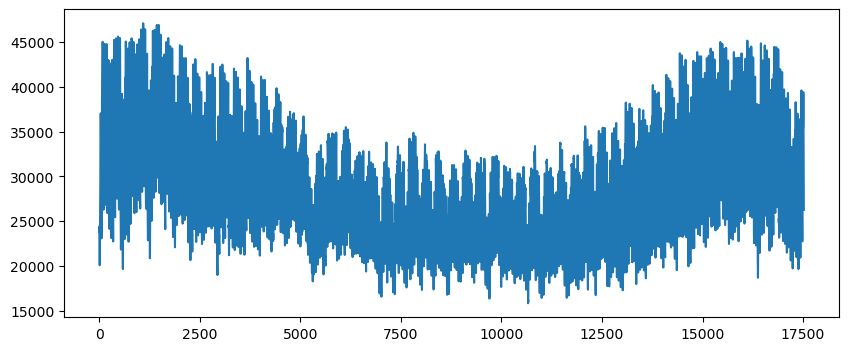

In [268]:
file2=file.copy()
plt.figure(figsize=(10,4))
plt.plot(file2.index, file2['ND'])
#file=file.iloc[1:, :]
file.head()
T= pd.DataFrame((file['ND']+ file['EMBEDDED_WIND_GENERATION']+ file['EMBEDDED_SOLAR_GENERATION']), columns=['Total'])
file2=pd.concat([file2,T], axis=1)#.reset_index()
print(file2['ND'],file2['Total'],file['EMBEDDED_WIND_GENERATION'], file['EMBEDDED_SOLAR_GENERATION'])
print(file)

Text(0.5, 1.0, 'Combined with Embedded Generation Estimates')

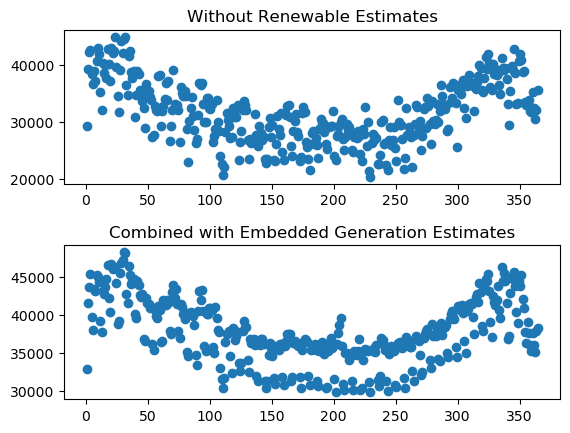

<Figure size 2000x1800 with 0 Axes>

In [269]:
file3=file.copy()
file3=file3.loc[file['SETTLEMENT_PERIOD']==24, :]
#print(file3)
fig, (ax1, ax2)=plt.subplots(2,1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
plt.figure(figsize=(20,18))
toplot= file3['ND']+ file3['EMBEDDED_WIND_GENERATION']+ file3['EMBEDDED_SOLAR_GENERATION']
ax1.scatter(file3.index/48, file3['ND'])
ax2.scatter(file3.index/48, toplot)
ax1.set_title("Without Renewable Estimates")
ax2.set_title("Combined with Embedded Generation Estimates")


I have been isolated 19:00 in the month of may. It seems like wednesday is the day with the highest usage of energy for some reason. To verifiy this I am going to have to split the month up into its individual weeks and then plot them separately. 

## Adding days to data
Here I use very basic webscraping to find which is the first day of the year and from there assign a day (monday, tuesday...) to all rows. This will help me with plotting.  

In [306]:
file4=file2.copy()
year=input('What year is the data for?')
url='https://www.calculator.net/day-of-the-week-calculator.html?today=01%2F01%2F{}&x=84&y=25'.format(year)
page = requests.get(url)
soup = bS(page.text, 'html.parser')
tab=soup.find('p', class_ = 'verybigtext')
first_day=str(tab)[44:47]
print(first_day)
print(url)
week=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
days={}
for i in range(0,7):
    days[int(i)]=week[int(i)]
    days[week[int(i)]]=int(i)
dayfrommonday=days[first_day]
n=[((i//48)+dayfrommonday)%7 for i in file4.index.tolist()]
Day=pd.DataFrame([days[j] for j in n], columns=['Day'])
#file4=pd.concat([Day, file4], axis=1)
file4['Day']=Day
print(file4.iloc[280,:])


What year is the data for?2019
Tue
https://www.calculator.net/day-of-the-week-calculator.html?today=01%2F01%2F2019&x=84&y=25
SETTLEMENT_DATE              06-JAN-2019
SETTLEMENT_PERIOD                     41
ND                                 37752
TSD                                39135
ENGLAND_WALES_DEMAND               34088
EMBEDDED_WIND_GENERATION             600
EMBEDDED_WIND_CAPACITY              5918
EMBEDDED_SOLAR_GENERATION              0
EMBEDDED_SOLAR_CAPACITY            13052
Total                              38352
Day                                  Sun
Name: 280, dtype: object


I realised that I have forgotten about the Clocks moving forwards and back! I initially thought I would have to do more basic webscraping but because the clocks moving following a pattern, I will not have to do so.

The clocks go fowards at 1 oclock on the last sunday of March. 

They go back at 2 oclock on the last Sunday of October. 



In [307]:
dst1=file4[(file4['SETTLEMENT_DATE'].str.contains('MAR'))&(file4['Day']=='Sun')]['SETTLEMENT_DATE'].unique()[-1]
i=file4[file4['SETTLEMENT_DATE']==dst1].index[0]
copy=file4.loc[i:i+1, :].copy()
file4.loc[i:i+45, 'SETTLEMENT_PERIOD']=file4.loc[i:i+45, 'SETTLEMENT_PERIOD']+int(2)
file5=pd.concat([file4.loc[0:i-1, :],copy, file4.loc[i:, :]], axis=0)#.reset_index
file5=file5.reset_index()
file5.drop('index', axis=1, inplace=True)
#print(file5)
#print(len(file4))
#print(file5[file5['SETTLEMENT_DATE']=='31-MAR-2019'])
#print(len(file4))
#print(len(file5))
dst2=file5[(file5['SETTLEMENT_DATE'].str.contains('OCT'))&(file5['Day']=='Sun')]['SETTLEMENT_DATE'].unique()[-1]
#print(file5.loc[i:i+60, :])
j=file5[file5['SETTLEMENT_DATE']==dst2].index[0]
print(file5.loc[j:j+60,:])
file5.drop([j+2, j+3], axis=0, inplace=True)
print(file5.loc[j:j+60,:])
#copy=file4.loc[j:j+1, :].copy()

      SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
14352     27-OCT-2019                  1  22260  23816                 20795   
14353     27-OCT-2019                  2  21571  23195                 20214   
14354     27-OCT-2019                  3  21310  22970                 20035   
14355     27-OCT-2019                  4  21631  23150                 20399   
14356     27-OCT-2019                  5  21331  23102                 20171   
14357     27-OCT-2019                  6  20938  22707                 19813   
14358     27-OCT-2019                  7  20497  22352                 19396   
14359     27-OCT-2019                  8  20325  22422                 19169   
14360     27-OCT-2019                  9  20045  22695                 18835   
14361     27-OCT-2019                 10  19645  22458                 18473   
14362     27-OCT-2019                 11  19545  22070                 18424   
14363     27-OCT-2019                 12

In [299]:
a=pd.DataFrame([2,2,2], columns=['a'])
a.loc[1:2, 'a']=a.loc[1:2, 'a']+2
print(a+2)
a.drop([0,1], axis=0,inplace=True)
print(a+2)

   a
0  4
1  6
2  6
   a
2  6


6996    26-MAY-2019
6948    25-MAY-2019
6612    18-MAY-2019
7044    27-MAY-2019
6660    19-MAY-2019
Name: SETTLEMENT_DATE, dtype: object


C:\Users\Calum\AppData\Local\Temp\ipykernel_3068\3721535349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may7pm['toplot']=toplot


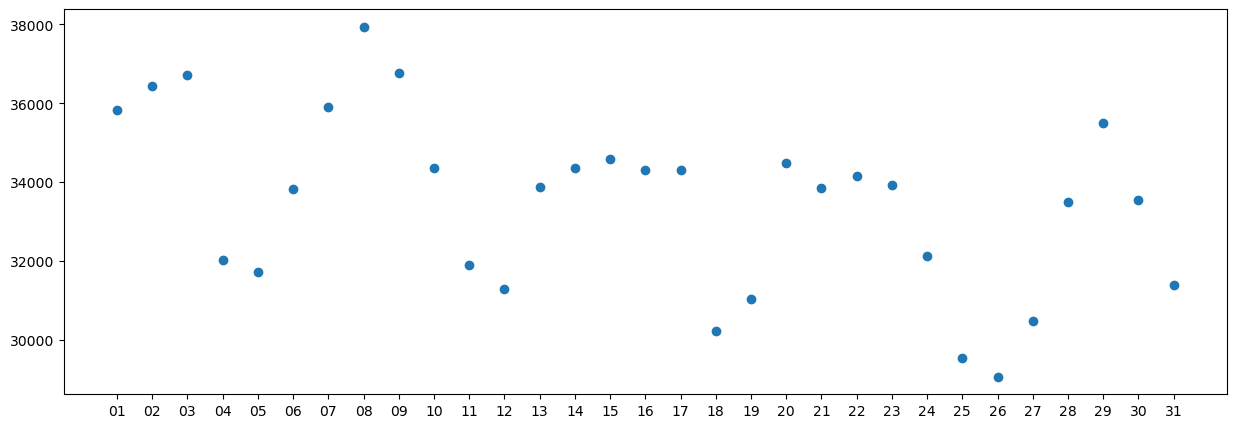

In [273]:
may7pm=file.loc[(file['SETTLEMENT_PERIOD']==39) & (file['SETTLEMENT_DATE'].str.contains('MAY')), :]
#print(may7pm)
#file['SETTLEMENT_PERIOD']==39
toplot= may7pm['ND']+ may7pm['EMBEDDED_WIND_GENERATION']+ may7pm['EMBEDDED_SOLAR_GENERATION']
may7pm['toplot']=toplot
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
plt.scatter(may7pm['SETTLEMENT_DATE'].str[0:2], toplot)
#print(may7pm['toplot'])
may7pm=may7pm.sort_values('toplot')
print(may7pm.loc[:,'SETTLEMENT_DATE'].head(5))

## Looking for Patterns
Here I want to mess about with different plots to see if I can find any hidden patterns in electricity data. I had a suspicion that maybe through the week there would be a different demand on different days, for example wednesday evenings have a higher demand than tuesdays but this wasn't the case.

Text(0.5, 1.0, 'Wednesday-Monday for total energy')

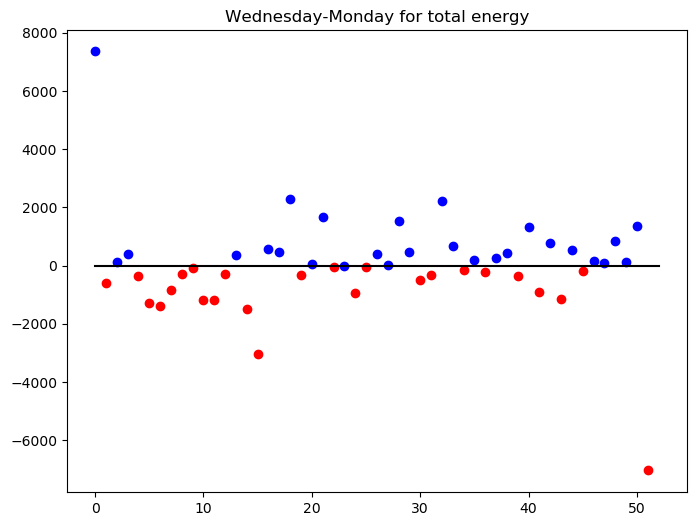

In [274]:
sp=37  ##39 equates to 19:00
day1='Wed'
day2='Tue'
y=(file4.loc[(file4.Day==day1) & (file4.SETTLEMENT_PERIOD==sp), :]['Total'].tolist()-file4.loc[(file4.Day==day2) & (file4.SETTLEMENT_PERIOD==sp), :]['Total'][:-1]).tolist()
df=pd.DataFrame(y, columns=['diff'])
fig, ax=plt.subplots( figsize=(8,6))
ax.scatter(df[df['diff']>0].index.tolist(), df[df['diff']>0], c='b')
ax.scatter(df[df['diff']<0].index.tolist(), df[df['diff']<0], c='r')
ax.plot([0, 52],np.zeros(2), c='k')
ax.set_title('Wednesday-Monday for total energy')


In [275]:
w=file4[file4['Day']=='Wed']
l=w['SETTLEMENT_DATE'].unique()
print(len(l))
print(l)
wa=[file4[file4['SETTLEMENT_DATE']==i]['Total'].mean() for i in l]
    
print(wa)
print(len(wa))
print(len(file4))

82
['02-JAN-2019' '09-JAN-2019' '16-JAN-2019' '23-JAN-2019' '30-JAN-2019'
 '06-FEB-2019' '13-FEB-2019' '20-FEB-2019' '27-FEB-2019' '06-MAR-2019'
 '13-MAR-2019' '20-MAR-2019' '27-MAR-2019' '03-APR-2019' '04-APR-2019'
 '10-APR-2019' '11-APR-2019' '17-APR-2019' '18-APR-2019' '24-APR-2019'
 '25-APR-2019' '01-MAY-2019' '02-MAY-2019' '08-MAY-2019' '09-MAY-2019'
 '15-MAY-2019' '16-MAY-2019' '22-MAY-2019' '23-MAY-2019' '29-MAY-2019'
 '30-MAY-2019' '05-JUN-2019' '06-JUN-2019' '12-JUN-2019' '13-JUN-2019'
 '19-JUN-2019' '20-JUN-2019' '26-JUN-2019' '27-JUN-2019' '03-JUL-2019'
 '04-JUL-2019' '10-JUL-2019' '11-JUL-2019' '17-JUL-2019' '18-JUL-2019'
 '24-JUL-2019' '25-JUL-2019' '31-JUL-2019' '01-AUG-2019' '07-AUG-2019'
 '08-AUG-2019' '14-AUG-2019' '15-AUG-2019' '21-AUG-2019' '22-AUG-2019'
 '28-AUG-2019' '29-AUG-2019' '04-SEP-2019' '05-SEP-2019' '11-SEP-2019'
 '12-SEP-2019' '18-SEP-2019' '19-SEP-2019' '25-SEP-2019' '26-SEP-2019'
 '02-OCT-2019' '03-OCT-2019' '09-OCT-2019' '10-OCT-2019' '16-OCT-2019'
 '1

In [276]:
s=25
d1='wed'
d2='mon'
o1=file4.loc[(file4.Day==d1) & (file4['SETTLEMENT_PERIOD']==s)]
o2=file4.loc[(file4.Day==d2) & (file4['SETTLEMENT_PERIOD']==s)]
#print(wed.iloc[1, 3])
print(len(o1))
w=[]
for i in range(0,len(o1)):
    if o1.iloc[i, 3]>o2.iloc[i,3]:
        w.append(i)
print(len(w))
#print(len([wed.iloc[i, 3]<tues.iloc[i,3] for i in range(0,len(wed))]))
#print(file4.loc[(file4.Day=='wed') < (file4.Day=='tues'), :])

0
0


# Chapter 3: Preparing data  <a class='anchor' id='chapter2'></a>


## How to deal with time data    <a class='anchor' id='sinusoids'></a>

Something that was troubling me was the fact that although December and January have a really close proximity to one another, they are not related by numbering them from 1-12, in that while january and february a month apart, that same relationship between january and december would not be appreciated in this system. 

Probably more importantly is the relationship between 24:00 at night and one oclock in the morning. These times are right next to one another but the algorithm would not be able to determine that, if they were kept as a 0-48 scale. 

The solution to this is to use a sinusiodal curve, with a $\omega$ of $\frac{2 \pi}{T}$ where T, the time period, is 48 for the daily scale and 365 for the yearly scale. I think it is necessary to match how the energy pattern changes over time for what kinf or curve we use. To explain this I am replotting something from earlier on in the project. 

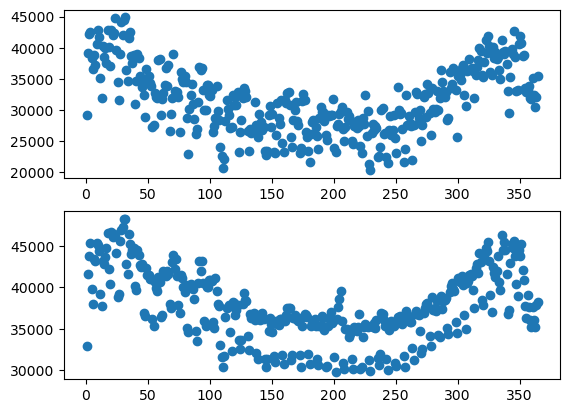

<Figure size 2000x1200 with 0 Axes>

In [277]:
fig, (ax1, ax2)=plt.subplots(2,1)
plt.figure(figsize=(20,12))
toplot= file3['ND']+ file3['EMBEDDED_WIND_GENERATION']+ file3['EMBEDDED_SOLAR_GENERATION']
ax1.scatter(file3.index/48, file3['ND'])
ax2.scatter(file3.index/48, toplot)

This is the energy usage at 12 oclock throughout the year and it seems to follow a cos curve quite well with some weird variations that I am attributing to christmas. Now if I applied a cos curve to the time of year column it would follow a similar crve to this. Does that make it easier for the algorithm to group data and provide insight? I think it probably does, and in fact is probably quite important. 

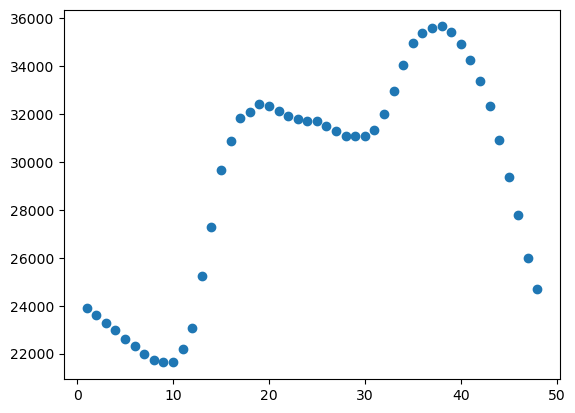

In [278]:
hours=file2['SETTLEMENT_PERIOD'].unique()
av=[]
for i in hours:
    av.append(file2.loc[file2['SETTLEMENT_PERIOD']==i, :]['ND'].mean())
fig, ax=plt.subplots()
ax.scatter(hours[0:-2], av[0:-2])
#Note I have lopped off two values which are due to the clocks changing

This is taken by averaging the power usage for each half an hour time period across the year. It makes an absolutely horrid graph haha but I think it would look better if this was slightly split up between the summer months. What is quite clear is that there is a connection between the values at the end of the day and the start of the next. it is also clear that a cos graph would not fit this data well at all. I will have to think carefully about what i choose, be it a cos graph a -sin plot or one of these with some offset,  $\delta$. 

Something to consider is that if I do use this method, the times will be bunched in a slightly odd way. This is because a uniform input varying between 0 and 2$\pi$ poduced a curve which is bunched around turns in the curve, around 0 and $\pi$ for a cosine curve adn around $-\frac{\pi}{2}$ and $\frac{\pi}{2}$ for a sin curve, while they are more spread out in period of the curve with a greater $\frac{d}{dx}$. Will have to think about how this will affect my project. 

In [279]:
def min(a):
    mi=1
    for i in mi:
        if 
        mi+=1

SyntaxError: invalid syntax (4206675914.py, line 4)

# Scrap

In [ ]:
M=file.loc[(file['SETTLEMENT_PERIOD']==39) & (file['SETTLEMENT_DATE'].str.contains('MAY')), :]